In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
df=pd.read_csv("telco2.csv", sep=",") #load file
pd.set_option('max_columns',43)
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [32]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)

In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


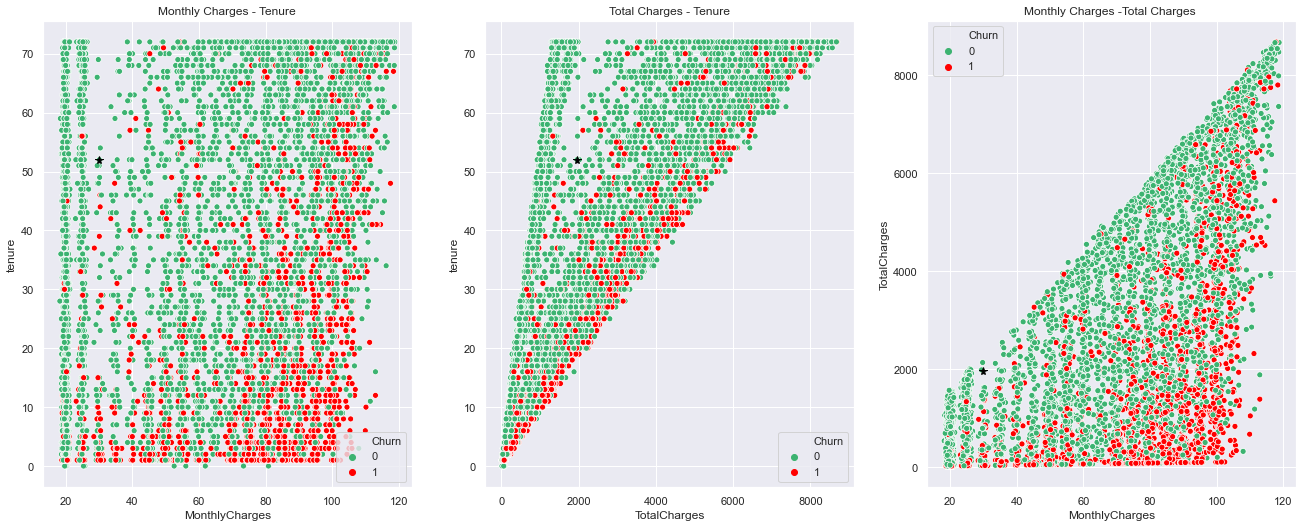

In [34]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x="MonthlyCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title('Monthly Charges - Tenure')
plt.plot(30,52, color='black', marker='*', markersize=8)

plt.subplot(1,3,2)
sns.scatterplot(x="TotalCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title("Total Charges - Tenure")
plt.plot(1960, 52, color='black', marker='*', markersize=8)

plt.subplot(1,3,3)
sns.scatterplot(x="MonthlyCharges", y="TotalCharges",palette=["mediumseagreen","red"], hue="Churn",data=df)
plt.title("Monthly Charges -Total Charges ")
plt.plot(30, 1960, color='black', marker='*', markersize=8)

plt.show()

## 1- Standart Scaler & Train - Test Split

In [35]:
from sklearn.preprocessing import StandardScaler
c = ["tenure","MonthlyCharges","TotalCharges","OnlineServices"]
for i in c:
    df[i] = StandardScaler().fit_transform(df[[i]])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992667,0,-1.145997,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172198,0,-0.176011,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958122,1,-0.176011,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193706,0,-0.176011,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.938930,1,-1.145997,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.127637,0,1.763962,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1.613701,1,1,1.277533,2.242641,0,1.278969,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.852985,0,-1.145997,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.870566,1,-0.661004,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [36]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

Text(0.5, 1.0, 'All Data')

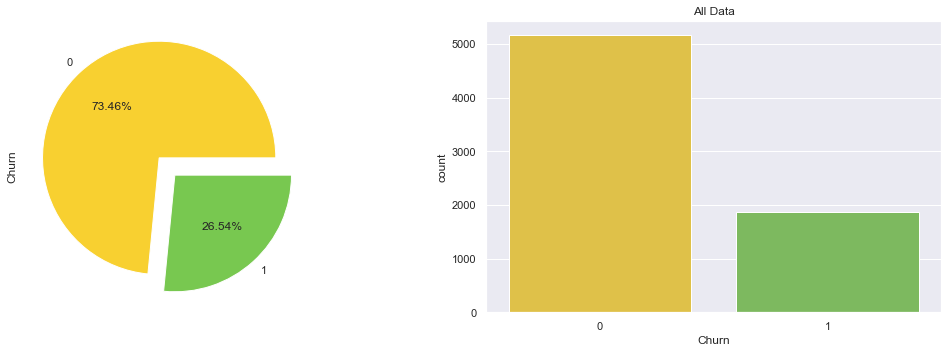

In [38]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=['#F8D030','#78C850'],explode = (0.1, 0.1),ax=ax[0])
plt.title("All Data")
sns.countplot(df["Churn"],ax=ax[1],palette=['#F8D030','#78C850'])
plt.title("All Data")

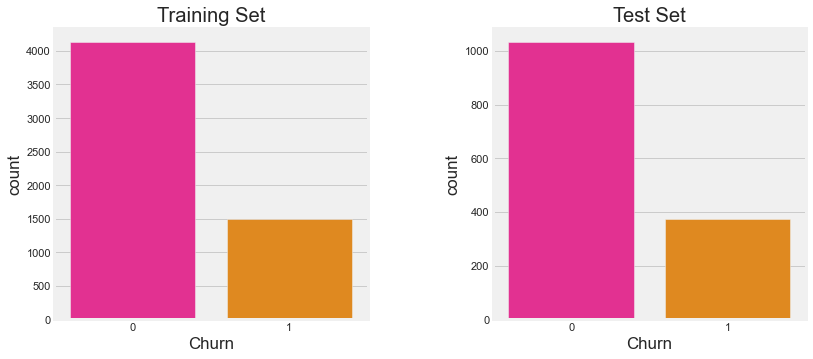

Proportion of '0' in all data     : %73 
Proportion of '0' in training set : %73 
Proportion of '0' in test set     : %73 


In [39]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(121)
sns.countplot(y_train,palette=['deeppink','darkorange'])
plt.title("Training Set")

plt.subplot(122)
sns.countplot(y_test,palette=['deeppink','darkorange'])
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [41]:
from sklearn.metrics import confusion_matrix

x_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)

c_matrix_train = confusion_matrix(y_train, x_pred)
c_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion matrix (Train data)", "-"*30, c_matrix_train, sep="\n")
print("Confusion matrix (Test data)", "-"*30, c_matrix_test, sep="\n")

Confusion matrix (Train data)
------------------------------
[[3763  376]
 [ 519  976]]
Confusion matrix (Test data)
------------------------------
[[876 159]
 [172 202]]


In [42]:
TN = c_matrix_test[0][0]
TP = c_matrix_test[1][1]
FP = c_matrix_test[0][1]
FN = c_matrix_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 876
Doğru pozitif sayısı   : 202
Yanlış pozitif sayısı  : 159
Yanlış negatif sayısı  : 172


In [43]:
from sklearn.metrics import accuracy_score
print("Modelin eğitim verisindeki doğruluğu : ",knn.score(X_train,y_train))
print("Modelden alınan doğruluk değeri : ",  knn.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score()        : ",  accuracy_score(y_test, y_pred))

Modelin eğitim verisindeki doğruluğu :  0.8411430599929003
Modelden alınan doğruluk değeri :  0.7650816181689141
Hesaplanan doğruluk değeri      :  0.7650816181689141
accuracy_score()        :  0.7650816181689141


In [44]:
test_array = np.array ([[1,0,0,0,52,0,0,30,1960,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0]])
knn_model.predict(test_array)

array([0], dtype=int64)

In [45]:
from sklearn.metrics import f1_score,classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred) )

print("f1_score()        : {:.2f}".format(f1_score(y_test, y_pred)))
print("recall_score()     : {:.2f}".format(recall_score(y_test, y_pred,average='macro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, y_pred,average='macro')))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, y_pred)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.56      0.54      0.55       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.76      1409

f1_score()        : 0.55
recall_score()     : 0.69
precision_score()  : 0.70


Hassasiyet : [0.83587786 0.55955679]
Duyarlılık : [0.84637681 0.54010695]
F1 Skoru   : [0.84109458 0.54965986]


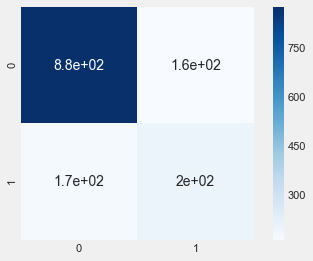

In [46]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, square=True, annot=True,  cmap="Blues")

In [47]:
test_prediction_proba = knn_model.predict_proba(X_test)[:,1]

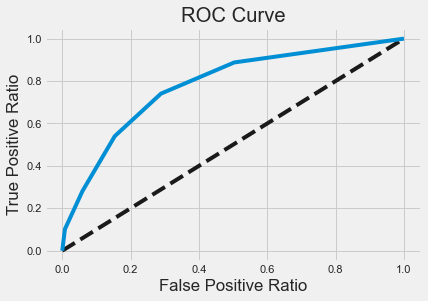

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

### Optimization

In [49]:
knn_params={"n_neighbors":np.arange(1,30),
          "weights":["uniform", "distance"],
          "metric":["manhattan","minkowski","euclidian"]}

grids_knn=GridSearchCV(estimator=knn,
                     param_grid=knn_params,
                     cv=10)

grids_knn.fit(X_train,y_train)

print("Best Parameters: " + str(grids_knn.best_params_))
print("Best Skor:" + str(grids_knn.best_score_))

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 29, 'weights': 'uniform'}
Best Skor:0.7980039807011576


In [51]:
grids_knn = grids_knn.cv_results_
grids_knn = pd.DataFrame(grids_knn)
grids_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052743,0.005662,0.051370,0.008097,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.734043,0.716312,0.728723,0.714539,0.710480,0.737123,0.708703,0.717584,0.708703,0.712256,0.718847,0.010041,112
1,0.050266,0.002389,0.037434,0.003882,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.734043,0.716312,0.728723,0.714539,0.710480,0.737123,0.708703,0.717584,0.708703,0.712256,0.718847,0.010041,112
2,0.059302,0.009464,0.075455,0.013596,manhattan,2,uniform,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.760638,0.742908,0.753546,0.751773,0.728242,0.754885,0.746004,0.753108,0.742451,0.740675,0.747423,0.008830,106
3,0.054073,0.005394,0.051360,0.004881,manhattan,2,distance,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.735816,0.718085,0.728723,0.712766,0.715808,0.737123,0.710480,0.717584,0.706927,0.712256,0.719557,0.010091,111
4,0.057523,0.010671,0.080887,0.014232,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.751773,0.758865,0.769504,0.737589,0.754885,0.753108,0.751332,0.747780,0.735346,0.728242,0.748842,0.011538,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.004717,0.004388,0.000000,0.000000,euclidian,27,distance,"{'metric': 'euclidian', 'n_neighbors': 27, 'we...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
170,0.003274,0.004194,0.000000,0.000000,euclidian,28,uniform,"{'metric': 'euclidian', 'n_neighbors': 28, 'we...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141
171,0.004081,0.004263,0.000000,0.000000,euclidian,28,distance,"{'metric': 'euclidian', 'n_neighbors': 28, 'we...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
172,0.003282,0.004189,0.000000,0.000000,euclidian,29,uniform,"{'metric': 'euclidian', 'n_neighbors': 29, 'we...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146


## 2- KFold Cross Validation & Eucliedean, Manhattan, Minkowski

In [52]:
y2 = y
X2 = X

In [53]:
from sklearn.model_selection import StratifiedKFold
knn3 = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
accuracy_1 = []
skf1 = StratifiedKFold(n_splits = 5,random_state = None)
skf1.get_n_splits(X2,y2)
for train2_index, test2_index in skf1.split(X2,y2):
    X2_train, X2_test = X.iloc[train2_index], X2.iloc[test2_index]
    y2_train, y2_test = y.iloc[train2_index], y2.iloc[test2_index]
    
    knn3.fit(X2_train, y2_train)
    prediction_1 =knn3.predict(X2_test)
    score_1 = accuracy_score(y2_test,prediction_1)
    accuracy_1.append(score_1)
    print("Train set size : {}".format(len(train2_index)))
    print("Test set size     : {}".format(len(test2_index)))
    print("Score: {:.3f}".format(score_1))
    print('-'*28, "\n")

Train set size : 5634
Test set size     : 1409
Score: 0.779
---------------------------- 

Train set size : 5634
Test set size     : 1409
Score: 0.761
---------------------------- 

Train set size : 5634
Test set size     : 1409
Score: 0.754
---------------------------- 

Train set size : 5635
Test set size     : 1408
Score: 0.771
---------------------------- 

Train set size : 5635
Test set size     : 1408
Score: 0.783
---------------------------- 



In [54]:
print("Mean score : {:.2f}".format(np.mean(accuracy_1)))

Mean score : 0.77


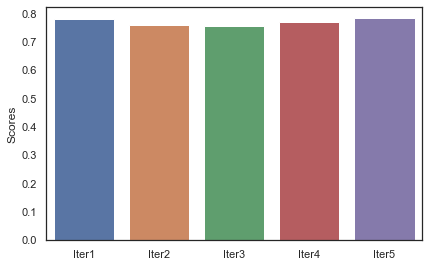

In [55]:
#I visualized the results of 5 iterations
scores = pd.DataFrame(accuracy_1,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

# Best Model 

In [56]:
n_number = np.arange(1,30)
train_score = np.empty(len(n_number))
test_score = np.empty(len(n_number))

In [57]:
for i, k in enumerate(n_number):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    train_score[i] = knn2.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_score[i] = knn2.score(X_test, y_test)

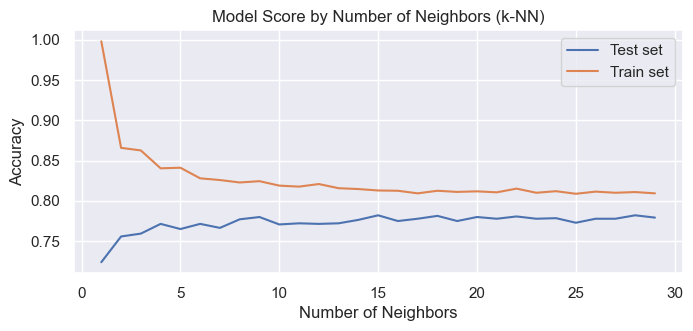

In [58]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(n_number,test_score, label = 'Test set')
plt.plot(n_number, train_score, label = 'Train set')
plt.legend()
plt.title('Model Score by Number of Neighbors (k-NN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [50]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(grids_knn.best_params_, 'knnmodel.pkl') 
joblib.dump(grids_knn.best_score_, 'knnmodelscore.pkl')   
# Load the model from the file 
#knn_from_joblib = joblib.load('knnmodel.pkl')  
#knn_from_score_joblib = joblib.load('knnmodelscore.pkl')

['knnmodelscore.pkl']